# Trying Out Image Classification Using Random Forests

#### Source is : [Analytics Vidhya Image Classification Using Machine Learning](https://www.analyticsvidhya.com/blog/2022/01/image-classification-using-machine-learning/)

#### Data File: (https://www.cs.toronto.edu/~kriz/cifar.html)

## Imports

In [2]:
# First, let’s import the required packages as follows

from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import cv2

In [3]:
# The dataset can be loaded using the code below:

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Further, we can obtain the size of the train and test datasets as shown below:

x_train.shape, x_test.shape

"""Thus, there is a total of 50,000 images for training and 10,000 images for 
testing. Besides, each of these images is of dimensions 32×32 and colour. 
The above details can be easily inferred from the shape returned.

NOTE: Observe that there is no need for a train-test-split in this case as 
train and test sets can be directly obtained from Keras!"""

170498071/170498071 [==============================] - 510s 3us/step


'Thus, there is a total of 50,000 images for training and 10,000 images for \ntesting. Besides, each of these images is of dimensions 32×32 and colour. \nThe above details can be easily inferred from the shape returned.\n\nNOTE: Observe that there is no need for a train-test-split in this case as \ntrain and test sets can be directly obtained from Keras!'

## Data PreProcessing

In [4]:
'''
This step includes the normalization of images followed by their reshaping.

Normalization is a common step of image pre-processing and is achieved by simply 
dividing x_train by 255.0 for the train dataset and x_test by 255.0 for the test dataset. 
This is essential to maintain the pixels of all the images within a uniform range.
'''

# Normalization
# Pawan's note: divide by 255 because each pixel is 8-bit or 1-byte? 3 R, 3 G, 2 Blue bits.
x_train = x_train/255.0
x_test = x_test/255.0

Now comes the most essential step of pre-processing, which is applicable only in this case as we aim to use machine learning for image classification. As we will be using the ML algorithms from sklearn, there is a need to reshape the images of the dataset to a two-dimensional array. This is because sklearn expects a 2D array as input to the fit() function which will be called on the model during training.

Thus, the images of the test dataset should also be resized to 2D arrays as the model was trained with this input shape.

NOTE: In the case of neural networks, we get to specify the input shape to the model and thus it is more flexible. But, in the case of sklearn, there are some restrictions.

The required code for the train set is as follows:

In [11]:
#sklearn expects i/p to be 2d array-model.fit(x_train,y_train)=>reshape to 2d array
nsamples, nx, ny, nrgb = x_train.shape
x_train2 = x_train.reshape((nsamples,nx*ny*nrgb))

''' The above code reshapes train set images from (50000,32,32,3) which is a 4D 
array to (50000,3072), a 2D array.3072 is obtained by multiplying the dimensions 
of the image(32x32x3=3072).'''

# The required code for the test set is given below:
# so,eventually,model.predict() should also be a 2d input
nsamples, nx, ny, nrgb = x_test.shape
x_test2 = x_test.reshape((nsamples,nx*ny*nrgb))

# Similarly, the images of the test set are reshaped from (10000,32,32,3) to (10000,3072).

# Implementing a Random Forest Classifier

Let’s build a Random Forest Classifier to classify the CIFAR-10 images.

In [7]:
#For this, we must first import it from sklearn:
from sklearn.ensemble import RandomForestClassifier

#Create an instance of the RandomForestClassifier class:
model=RandomForestClassifier()

#Finally, let us proceed to train the model:

model.fit(x_train2,y_train)

'''NOTE: Pass x_train2 to fit() function as it is the reshaped 2D array of the 
images and sklearn needs a 2D array as input here. Do this while fitting for all
the models as they are all implemented using sklearn'''

c:\Users\pawan\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [12]:
# Now, predict for the test set using the fitted Random Forest Classifier model:

y_pred=model.predict(x_test2)
y_pred

array([1, 8, 8, ..., 3, 2, 7], dtype=uint8)

The model returns a number from 0 to 9 as the output. This can be clearly observed from the predictions displayed. These answers can be mapped to their corresponding classes with the help of the following table:

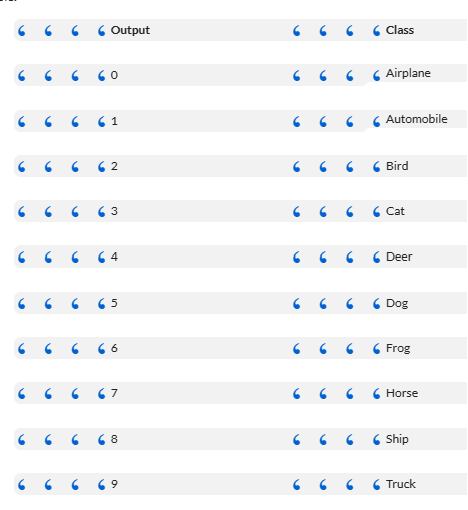

In [13]:
#Now, evaluate the model with the test images by obtaining its classification report, confusion matrix, and accuracy score.

accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

# Thus, Random Forest Classifier shows only 47% accuracy on the test set.

              precision    recall  f1-score   support

           0       0.55      0.54      0.54      1024
           1       0.53      0.52      0.53      1021
           2       0.32      0.37      0.34       861
           3       0.29      0.34      0.31       849
           4       0.39      0.39      0.39       999
           5       0.38      0.42      0.40       912
           6       0.56      0.46      0.51      1233
           7       0.46      0.53      0.49       874
           8       0.61      0.58      0.59      1060
           9       0.55      0.47      0.50      1167

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.46     10000
weighted avg       0.47      0.46      0.47     10000



In [14]:
confusion_matrix(y_pred,y_test)

array([[550,  35,  99,  55,  56,  27,  11,  50,  95,  46],
       [ 38, 532,  46,  46,  22,  22,  33,  36,  83, 163],
       [ 58,  16, 318,  71, 161,  89,  71,  42,  16,  19],
       [ 17,  34,  98, 286,  48, 160,  74,  65,  32,  35],
       [ 30,  20, 145,  71, 394,  74, 124, 104,  19,  18],
       [ 17,  31,  69, 184,  57, 383,  51,  69,  31,  20],
       [ 26,  42, 117, 149, 148,  93, 564,  54,  11,  29],
       [ 27,  33,  57,  54,  67,  89,  25, 461,  21,  40],
       [174,  65,  27,  15,  26,  27,   8,  23, 611,  84],
       [ 63, 192,  24,  69,  21,  36,  39,  96,  81, 546]], dtype=int64)

# Implementing a KNN

KNN stands for K-Nearest neighbours. It is also an algorithm popularly used for multi-class classification.

It is implemented in sklearn using KNeighborsClassifier class.

In [15]:
#We begin by importing it:

from sklearn.neighbors import KNeighborsClassifier

#and then instantiating it to create a KNN model:
knn=KNeighborsClassifier(n_neighbors=7)

#I have chosen 7 neighbours randomly. Feel free to play with the number of neighbours 
#to arrive at a better and thus optimal model.

In [16]:
#Finally, train it:

knn.fit(x_train2,y_train)

c:\Users\pawan\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [17]:
#Now, predict for the test set using the fitted KNN model:

y_pred_knn=knn.predict(x_test2)
y_pred_knn

#The predictions are outputs representing the classes as described in the previous algorithm.

array([2, 8, 8, ..., 5, 6, 4], dtype=uint8)

In [18]:
#Now, proceed to evaluate the KNN model just the way we evaluated our previous model.

accuracy_score(y_pred_knn,y_test)
print(classification_report(y_pred_knn,y_test))

# Thus, the KNN Classifier shows only 34% accuracy on the test set.

              precision    recall  f1-score   support

           0       0.52      0.40      0.45      1299
           1       0.20      0.70      0.30       280
           2       0.44      0.22      0.29      2013
           3       0.20      0.28      0.23       707
           4       0.52      0.23      0.32      2222
           5       0.20      0.40      0.27       504
           6       0.27      0.35      0.30       761
           7       0.20      0.70      0.31       281
           8       0.69      0.39      0.50      1749
           9       0.14      0.73      0.23       184

    accuracy                           0.34     10000
   macro avg       0.34      0.44      0.32     10000
weighted avg       0.45      0.34      0.35     10000



In [19]:
confusion_matrix(y_pred_knn,y_test)

array([[518, 118, 110,  66,  60,  63,  22,  78, 112, 152],
       [  7, 195,   2,   5,   0,   2,   1,   8,  10,  50],
       [118, 124, 437, 243, 268, 225, 271, 185,  47,  95],
       [ 12,  51,  50, 199,  33, 156,  56,  57,  34,  59],
       [ 46, 173, 250, 214, 521, 201, 319, 294,  69, 135],
       [  5,  32,  24, 102,  14, 204,  32,  60,  12,  19],
       [ 30,  55,  65, 108,  44,  80, 265,  48,  14,  52],
       [  5,   8,   7,  11,  11,  10,   1, 196,   7,  25],
       [255, 223,  53,  51,  48,  53,  32,  68, 688, 278],
       [  4,  21,   2,   1,   1,   6,   1,   6,   7, 135]], dtype=int64)

# Implementing a Decision Tree
It is implemented in sklearn using the DecisionTreeClassifier class.

In [20]:
#We begin by importing it:
from sklearn.tree import DecisionTreeClassifier

#and then instantiating it to create a DecisionTreeClassifier model:
dtc=DecisionTreeClassifier()

In [21]:
#Finally, train it:

dtc.fit(x_train2,y_train)

DecisionTreeClassifier()

In [ ]:
#Now, predict for the test set using the fitted decision tree model:

y_pred_dtc=dtc.predict(x_test2)
y_pred_dtc

#The predictions are outputs representing the classes as described in the previous algorithm.

In [ ]:
#Now, proceed to evaluate the decision tree model just the way we evaluated our previous model.

accuracy_score(y_pred_dtc,y_test)
print(classification_report(y_pred_dtc,y_test))

#Thus, the Decision tree Classifier shows only 27% accuracy on the test set.

In [ ]:
confusion_matrix(y_pred_dtc,y_test)

# Implementing a Naive Bayes classifier
It is the most fundamental machine learning classifier, also abbreviated as NB. It works based on Bayes Theorem and has independent features.

It is implemented in sklearn using the GaussianNB class.

In [ ]:
# We begin by importing it:
from sklearn.naive_bayes import GaussianNB

#and then instantiating it to create an NB model:
nb=GaussianNB()

In [ ]:
#Finally, train it:

nb.fit(x_train2,y_train)
Now, predict for the test set using the fitted NB model:


In [ ]:
y_pred_nb=nb.predict(x_test2)
y_pred_nb

#The predictions are outputs representing the classes as described in the previous algorithm.

In [ ]:
Now, proceed to evaluate the decision tree model just the way we evaluated our previous model.

accuracy_score(y_pred_nb,y_test)
print(classification_report(y_pred_nb,y_test))

# Thus, the Naive Bayes Classifier shows only 30% accuracy on the test set

In [ ]:
confusion_matrix(y_pred_nb,y_test)

The accuracies of the four ML algorithms, we just explored for our CIFAR-10 dataset, can be summarized using the graph shown above.

Random Forest Classifier shows the best performance with 47% accuracy followed by KNN with 34% accuracy, NB with 30% accuracy, and Decision Tree with 27% accuracy. Thus, Random Forest exhibits the best performance and Decision Tree the worst.

However, all the Machine learning algorithms perform poorly as indicated by the accuracies. The highest is just 47% while Deep learning algorithms outsmart them exceptionally with accuracies mostly exceeding 90%!!!

That’s why I mentioned at the beginning itself that this work can only be used to compare a Deep Learning model and defend the DL model.

# Testing for custom input
From the above results, as RandomForestClassifier shows the best performance among all and a decent accuracy as well, let us choose this model.

Custom input refers to a single image that you want to pass to the model and test. Testing a model for a single input is widely used in various real-time applications. For instance, an individual’s photo is inputted into the system for face recognition.

I have used the following custom image to test my model: https://cdn.download.ams.birds.cornell.edu/api/v1/asset/202984001/1200

In [ ]:
#Mention the path of your image-the location where you have stored the custom image you want to test.
# Pawan's Notes: this part needs to be fixed 

img_path='/content/bird.jfif'


In [ ]:
# First, read the image using OpenCV and then resize it to 32×32.

img_arr=cv2.imread(img_path)
img_arr=cv2.resize(img_arr,(32,32))

In [ ]:
#Now, reshape the image to 2D as discussed in the pre-processing section:
#so,eventually,model.predict() should also be a 2d input

nx, ny, nrgb = img_arr.shape
img_arr2 = img_arr.reshape(1,(nx*ny*nrgb))

In [ ]:
#Let us declare a list called classes:

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
#It has all ten categories. The output of the model, as discussed earlier, will 
# be from 0 to 9 and the corresponding class can be retrieved from the above list.

In [ ]:
#Finally, pass the required array to the Random forest classifier using the predict() function.

ans=model.predict(img_arr2)
print(classes[ans[0]])
#RandomForestClassifier

'''The answer variable is a list having only one number which is the index of the classes list. 
The category at this index is the predicted class.

The model predicts it to be a bird which is right! But, it predicts incorrectly for a few test images. 
The drawback can be overcome by building a CNN or ANN model instead.'''